# **What Makes Song Popular? Analyzing Most Streamed Songs on Spotify**
Fall 2024 Data Science Project
Aastha Gautam UID:119006382, Tejasa Yaddula UID:117211801, Alex Shrestha UID:118090115

Contributions:
- Introduction - Tejasa; Tejasa found the dataset and came up with the idea for what how to use it and generate insights.
- parse and display dataset - Aastha; Aastha loaded and parsed the dataset for easy display.
- Calculate mean, median, mode, and standard deviation for numerical columns like streams, BPM, and playlist - Aastha; Aastha displayed summary statustics of the dataset.
- Distribution of Song by Release Year - Aastha; Aastha showed the distribution of song by release year.
- Danceability vs Streams - Aastha; Aastha showed the correlation between danceability and streams. Tejasa wrote the conclusion for this.
- Correlation Between Streams and Musical Features - Tejasa
- Correlation Between Playlist Inclusion and Streams - Tejasa
- Artist Collaboration Impact - Tejasa
- BPM vs. Streams - Tejasa
- ML Algorithm Design/Development - Tejasa (Design) and Aastha (Development)
- ML Algorithm Training and Test Data Analysis - Aastha
- Visualization - Aastha (Visualization 1) and Alex (Visualization 2)
- Results Analysis - Alex and Tejasa; Tejasa analyzed the first visualization, and Alex wrote rational for creating the second visualization.
- Conclusion - Alex and Tejasa; Tejasa wrote iinsights and conclusions. Alex Wrote answers to two questions.


# **Introduction**

**What datasets are you choosing? Cite the source(s).**

We’ll be using Spotify’s most streamed songs. This dataset consists of musical
attributes of songs with percentages, as well as streaming metrics, and track identifying
information.
Spotify most streamed songs. (2024, September 7). Kaggle.
https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs

**Why are you choosing this dataset?**

We want to see what factors of a song make it popular. Comparing musical attributes with
streaming statistics may generate insight on current music trends, as well as how spotify should
push certain songs to the forefront. We all really like listening to music, and this seems like a fun
project to draw insights from. We hope to help predict a song's popularity based on musical characteristics.

# **Exploratory Data Analysis**

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs

In [ ]:
from google.colab import files
uploaded = files.upload()
# Load the dataset
df = pd.read_csv('Spotify Most Streamed Songs.csv')

# Parse and organize: Convert necessary columns to numeric types
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df[['in_deezer_playlists', 'in_shazam_charts']] = df[['in_deezer_playlists', 'in_shazam_charts']].apply(pd.to_numeric, errors='coerce')

# Display info about the dataset after parsing
df.info()

# Display the first few rows to verify parsing
df.head()

Saving Spotify Most Streamed Songs.csv to Spotify Most Streamed Songs (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   874 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      896 non-null    float64
 

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


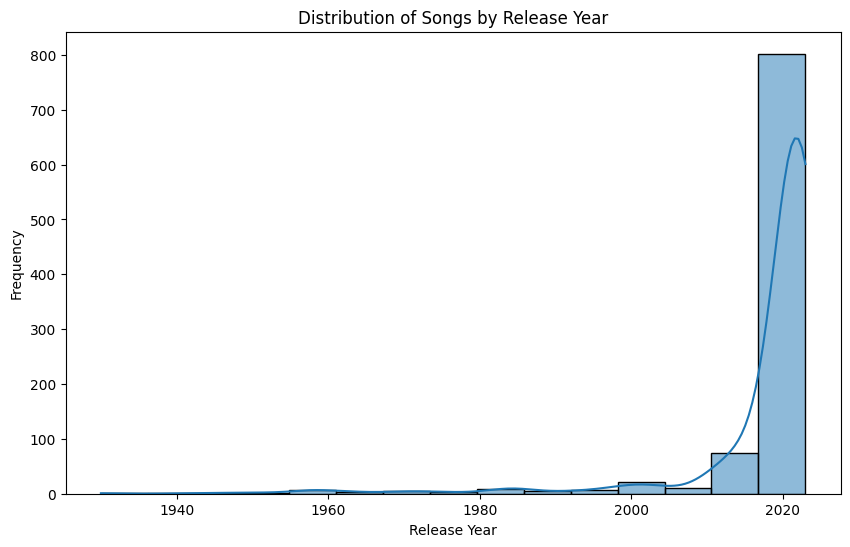

In [ ]:
# Summary statistics
df.describe()

# Plot the distribution of release years to identify over-representation of year
plt.figure(figsize=(10, 6))
sns.histplot(df['released_year'], bins=15, kde=True)
plt.title('Distribution of Songs by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

Conclusion: This graph does show that there is an overrpresentation of most streamed music for songs in 2020, and a general upward trend as the years increase. There is a slight spike in 2000 and then another one 2010 which makes sense.

Correlation coefficient: -0.1054568836914191, P-value: 0.001119497946396513


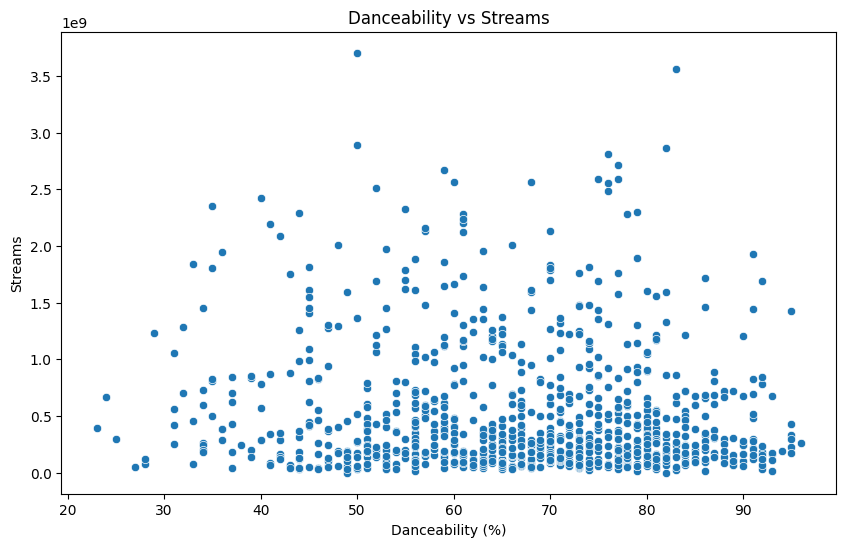

In [ ]:
# Calculate the correlation between 'danceability_%' and 'streams'
aligned_data = df[['danceability_%', 'streams']].dropna()
corr_dance_streams, p_value_dance_streams = stats.pearsonr(aligned_data['danceability_%'], aligned_data['streams'].dropna())

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {corr_dance_streams}, P-value: {p_value_dance_streams}')

# Create a scatterplot for danceability vs energy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability_%', y='streams', data=df)
plt.title('Danceability vs Streams')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.show()

Conclusion: There seems to be a slight negative correlation between danceability and popularity. With a p-value < 0.05, the pearson coefficient of -0.105 is significant.

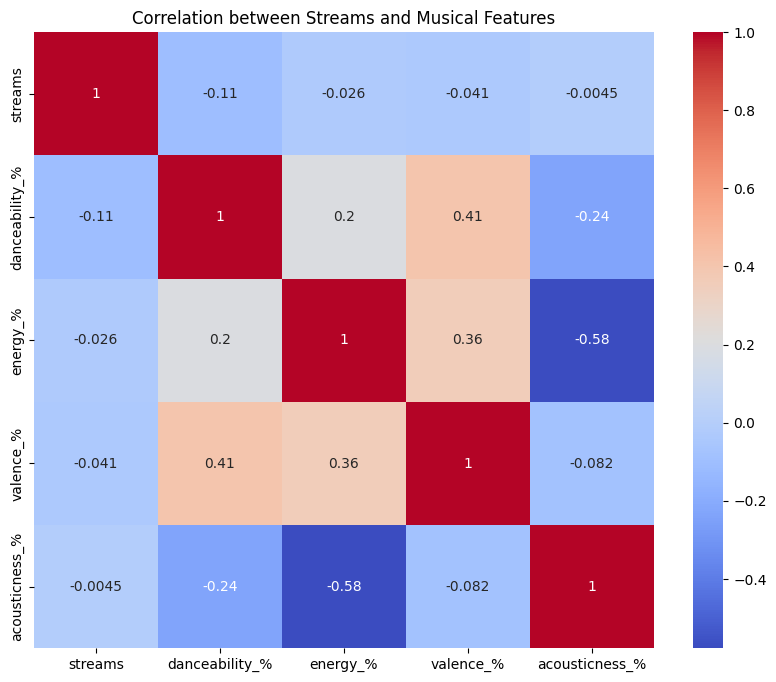

In [ ]:
#Correlation Analysis

corr_features = ['streams', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Streams and Musical Features')
plt.show()

Conclusion: Streams appears to have the greatest correlation with danceability (-0.11) compared with other musical attributes. The greatest positive correlation is between danceability and valence. The greatest negative correlation is between energy and acousticness.


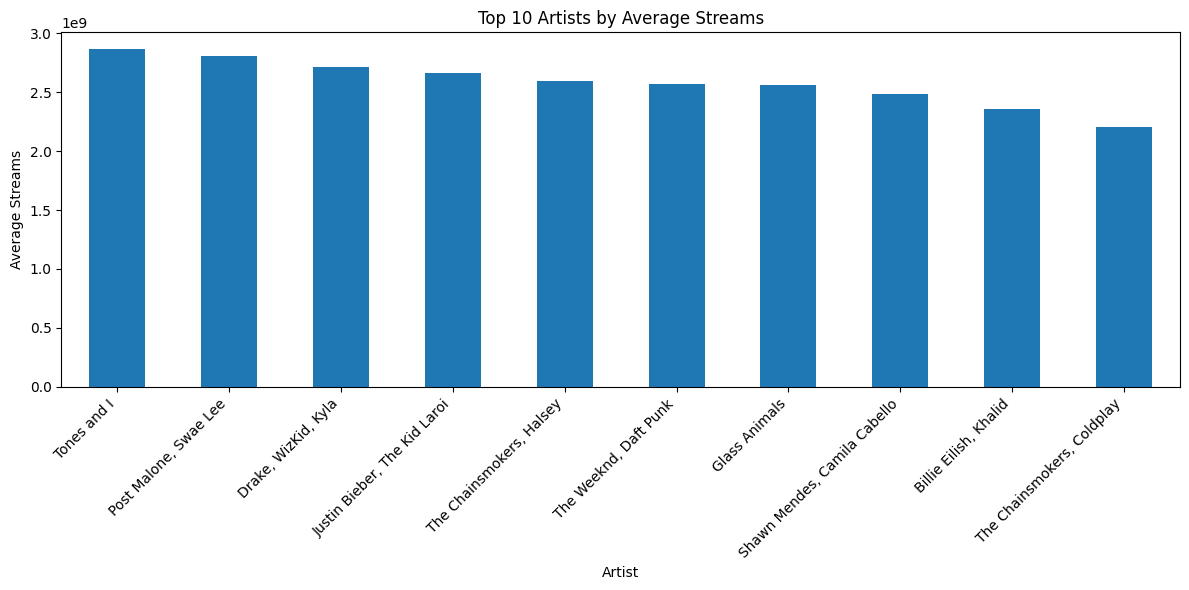

In [ ]:
#Genre Analysis

#Clean Streams Data
#df['streams'] = pd.to_numeric(df['streams'].replace('[^\d.]', '', regex=True),
    #                          errors = 'coerce')

artist_popularity = df.groupby('artist(s)_name')['streams'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
artist_popularity.plot(kind='bar')
plt.title('Top 10 Artists by Average Streams')
plt.xlabel('Artist')
plt.ylabel('Average Streams')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conclusion: The most popular artists are mostly hip hop and pop.


In [ ]:
#Correlation between Playlist Inclusion and Streams

playlist_correlation = df[['in_deezer_playlists', 'in_shazam_charts', 'in_spotify_playlists', 'in_apple_playlists', 'streams']].corr()['streams'].sort_values(ascending=False)

print('Correlation between Playlist Inclusion and Streams:')
print(playlist_correlation)



Correlation between Playlist Inclusion and Streams:
streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_deezer_playlists     0.746022
in_shazam_charts        0.056881
Name: streams, dtype: float64


Conclusion: Playlist Inclusion is strongly correlated with stream. Being included in Spotify playlist has the strongest positive correlation (0.789), and being included in a Shazam playlist has the weakest (0.057).

Average Streams for Solo Tracks vs Collaborations
is_collaboration
False    5.682117e+08
True     4.275595e+08
Name: streams, dtype: float64


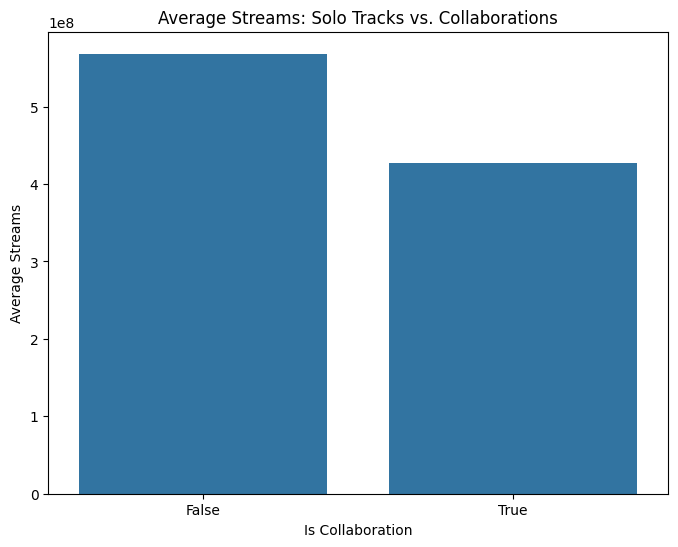

In [ ]:
#Artist Collaboration Impact

#Create a Binary Column for Collaborations
df['is_collaboration'] = df['artist_count'] > 1
collaboration_impact = df.groupby('is_collaboration')['streams'].mean()

print('Average Streams for Solo Tracks vs Collaborations')
print(collaboration_impact)

#Visualize the Difference
plt.figure(figsize=(8,6))
sns.barplot(x=collaboration_impact.index, y=collaboration_impact.values)
plt.title('Average Streams: Solo Tracks vs. Collaborations')
plt.xlabel('Is Collaboration')
plt.ylabel('Average Streams')
plt.show()

Conclusion: Solo artists have more streams than collaborative artists.


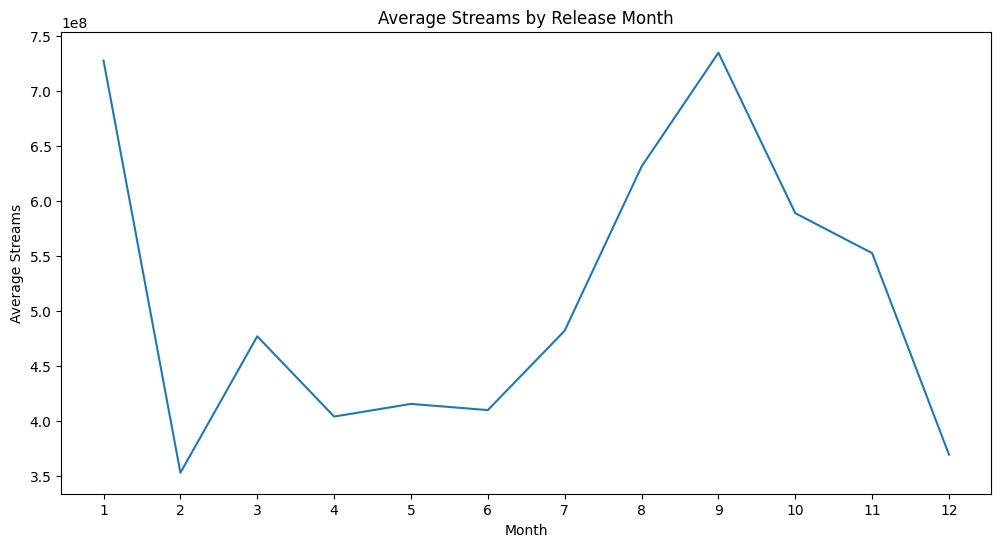

In [ ]:
#Seasonality

#Group by release month and calculate mean streams

monthly_trends = df.groupby('released_month')['streams'].mean()

#Create Line plot for monthly trends

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_trends.index, y=monthly_trends.values)
plt.title('Average Streams by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Streams')
plt.xticks(range(1, 13))
plt.show()

Conclusion: The average streams is highest for songs released in September and January. It is lowest for songs released in December and February.

Average Streams by Key in Millions:
key
C#    604.280249
E     577.497189
D#    553.036540
A#    552.475435
D     529.525559
F#    522.363151
B     519.347957
G#    476.911864
F     468.446389
G     452.599401
A     408.841412
Name: streams, dtype: float64


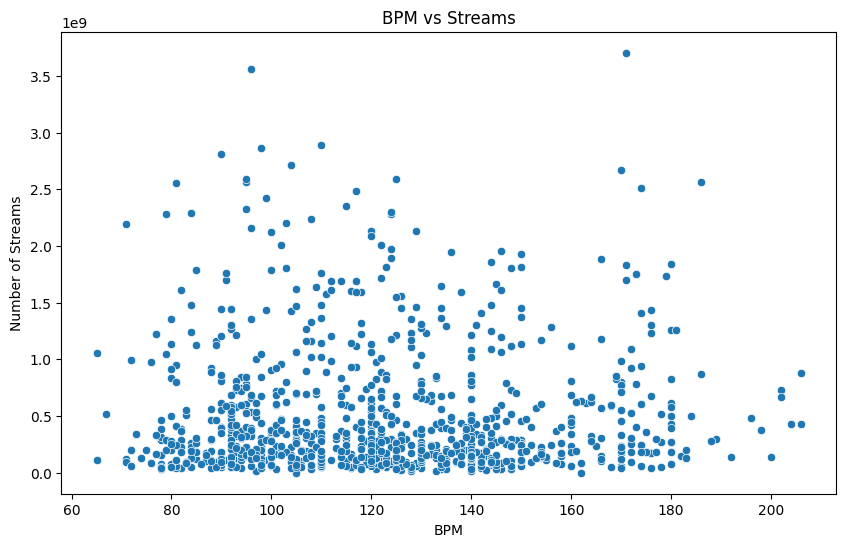

Correlation between BPM and Streams: -0.00


In [ ]:
#Calculate Average Streams for Each Key
key_popularity = ((df.groupby('key')['streams'].mean())/1000000).sort_values(ascending=False)

print('Average Streams by Key in Millions:')
print(key_popularity)

#Visualize BPM vs. Streams
plt.figure(figsize=(10,6))
sns.scatterplot(x='bpm', y='streams', data=df)
plt.title('BPM vs Streams')
plt.xlabel('BPM')
plt.ylabel('Number of Streams')
plt.show()

#Calculate correlation between BPM and streams
bpm_correlation = df['bpm'].corr(df['streams'])
print(f'Correlation between BPM and Streams: {bpm_correlation:.2f}')

Conclusion: There appears to be no correlation between BPM and Streams.

# **ML Algorithm Design and Development**

A random forest regression would be the best as the target variable can be streams as a measure of song popularity. The features can be musical attributes as well as release year, release month, and playlist inclusion. A regression would allow us to quantify the relationship between the characteristics of a song and popularity of a song. We can use a model to predict the popularity of new songs based on their attributes.

# **ML Algorithm Training and Test Data Analysis**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (Assuming 'Spotify Most Streamed Songs.csv' is already uploaded)
df = pd.read_csv('Spotify Most Streamed Songs.csv')

# Data Preprocessing
# Convert necessary columns to numeric, handling errors
numeric_columns = ['streams', 'danceability_%', 'energy_%', 'valence_%',
                   'acousticness_%', 'bpm', 'released_month', 'released_year', 'in_spotify_playlists']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in any of the selected features or target variable
df.dropna(subset=numeric_columns, inplace=True)

# Define Features (X) and Target (y)
X = df[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%',
        'bpm', 'released_month', 'released_year', 'in_spotify_playlists']]
y = df['streams']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Display feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))


Mean Squared Error (MSE): 5.021459838757911e+16
R-squared (R²): 0.7948689791481027
Feature Importances:
in_spotify_playlists    0.791037
released_year           0.086963
bpm                     0.023264
energy_%                0.022864
valence_%               0.021439
danceability_%          0.019369
acousticness_%          0.019094
released_month          0.015968
dtype: float64


# **Visualization 1**

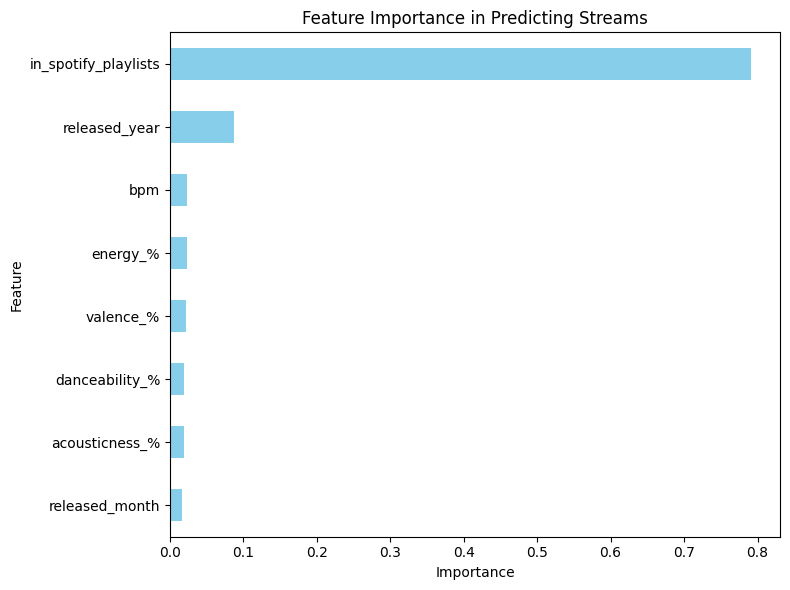

In [ ]:
#plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance in Predicting Streams')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# **Results Analysis**

Based on the plot we can see that 'in_spotify_playlists' has the highest of importance when predicting streams. Some of the other characteristics which predict a song's popularity include released_year, and bpm.

To delve deeper into the feature 'in_spotify_playlists' and its influence on predicting streams, we can create a more detailed visualization that explores how this feature correlates with streams and other relevant variables. By creating a distribution plot, This visualization will help us see if the inclusion in Spotify playlists generally leads to higher or lower streams.



# **Visualization 2**

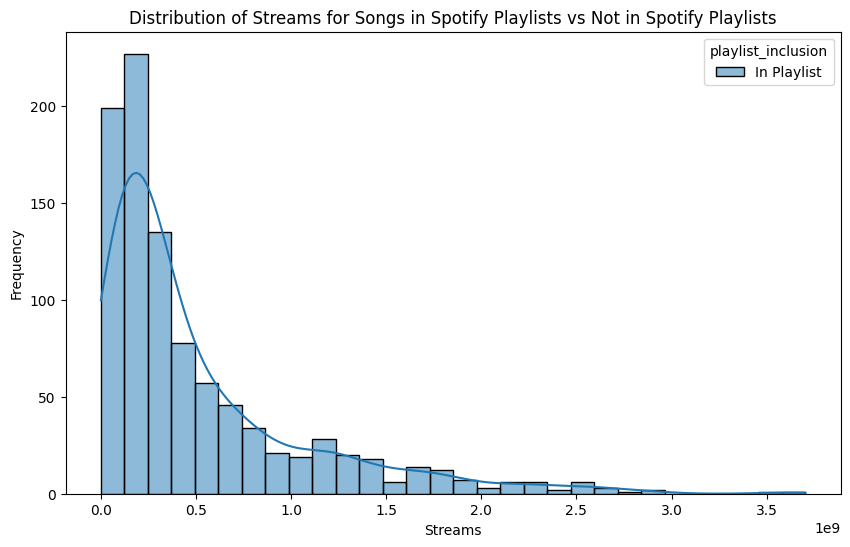

In [ ]:
#Visualization 2
#Distribution of Streams for Songs in Spotify Playlists vs. Not in Spotify Playlists

plt.figure(figsize=(10,6))

# Create a new column based on 'in_spotify_playlists' to categorize songs
df['in_spotify_playlists'] = df['in_spotify_playlists'].fillna(0)  # fill NaNs as 0 for clarity
df['playlist_inclusion'] = df['in_spotify_playlists'].apply(lambda x: 'In Playlist' if x > 0 else 'Not in Playlist')

# Plot the distribution of streams for songs in and out of playlists
sns.histplot(data=df, x='streams', hue='playlist_inclusion', multiple='stack', kde=True, bins=30)

plt.title('Distribution of Streams for Songs in Spotify Playlists vs Not in Spotify Playlists')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()




# **Insights and Conclusion**

From our predictive model, we were able to identify playlist inclusion as the central predictor of increasing streams for a song. After that, release year and BPM predict song popularity pretty well. Spotify and other streaming platforms can utilize this to understand how to increase song popularity and in turn increase user engagement.

A limitation of this project include a small training and testing set. In order to show the success of the model, it could be tested with updated most streamed songs, and improved through multiple trials.


# **1. Does an uninformed reader feel informed about the topic?**

Yes, an uninformed reader would likely feel informed after reading through the project. The structure is clear and logical, providing an introductory background on the dataset and how it is used to understand song popularity. The reader is guided through various analyses such as:

**Dataset Parsing & Summary Statistics**: The project explains how the dataset is parsed and processed, converting important columns into numeric data and providing basic statistics to set the context.

**Visualizations**: Graphs such as the distribution of release years, scatter plots for features like danceability vs. streams, and heatmaps for correlations provide a visual understanding of the relationships between musical features and popularity.

**Correlation and Insights**: The project explores correlations between different features (danceability, energy, key, BPM, etc.) and streams. It also discusses genre analysis, artist collaboration impact, and seasonality trends—helping the reader understand key factors influencing a song's success on Spotify.

**Random Forest Model**: For readers interested in a deeper, data-driven understanding, the project delves into predictive modeling. Using Random Forest to predict streams based on various features provides a more advanced, quantitative perspective.

# **2. Would a reader who already knew about the topic feel like they learned more about it?**

Yes, even a reader with prior knowledge about Spotify and its music trends would find valuable insights in this analysis. While they may already be familiar with general concepts like song popularity, danceability, BPM, and playlists, the project takes a deeper dive into:

**Correlation Insights**: By examining how specific features like danceability, BPM, and acousticness correlate with streams, the project uncovers relationships that may not be immediately obvious. For example, the slight negative correlation between danceability and popularity could offer a fresh perspective for someone already familiar with Spotify trends.

**Artist Collaboration Impact**: The analysis on whether collaborations lead to higher streams provides an interesting nuance that even informed readers might not have considered, exploring this factor quantitatively.

**Playlist Influence**: The correlation between playlist inclusion (on Deezer, Shazam, Spotify, etc.) and streams offers a deeper understanding of the role of playlists in driving popularity, which is a critical aspect of modern music discovery.

**Predictive Modeling**: The use of Random Forest modeling adds an advanced analytical layer, showing how features contribute to stream predictions. For data science enthusiasts, the inclusion of feature importance rankings and model evaluation (MSE, R²) provides a concrete understanding of which features are most influential in predicting popularity.